## ***Libraries***

In [1]:
# Importing Libraries(Technologies)
from math import sqrt
from pandas_datareader import data 
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import datetime as dt
import urllib.request,json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense,LSTM

Technologies used: Google colab, Python, Json, tf keras  

APIs used: wwo-hist, api.eia.gov

# ***DATA EXTRACTION***

In [ ]:
key = 'dd77e4c78c49c7b78faa3d08a9f429ee' # API Key

# URL url_string to access the data
url_string = 'https://api.eia.gov/series/?api_key=%s&series_id=EBA.HST-ALL.D.H'%key

# Open the URL url_string, which is a string.
url = urllib.request.urlopen(url_string)

# Reading JSON File from url
data = json.loads(url.read().decode())

# Accessing data of hourly consumption of Electricity 
data = data['series']
data = data[0]
data = data['data']

# DataFrame with date and electricity consumption on that date
df = pd.DataFrame(columns=['Date','Consumption'])
df['Consumption'] = df['Consumption'].astype(float)



# data is a list of lists in which each list contain two elements [date and time,consumption of electricity]
for v in data:

  # v[1] i.e. Consumption can't be null
  if(v[1]):

    # Consumption to floating-point numbers which is useful in further analysis
    consumption = float(int(v[1])*1.00)
    
    # Conversion date in string format[YYYYMMDDTHHZ] to datetime format in pandas
    s = v[0]
    # date = pd.to_datetime(s,format = '%Y%m%dT%HZ')
    date = v[0]

    # Adding data_row to dataframe
    data_row = [date,consumption]
    df.loc[-1,:] = data_row
    df.index += 1



KeyboardInterrupt: ignored

In [ ]:
# first five rows of dataframe df
df.head()

,Date,Consumption
42644,20200625T22Z,113.0
42643,20200625T21Z,112.0
42642,20200625T20Z,110.0
42641,20200625T19Z,70.0
42640,20200625T18Z,106.0


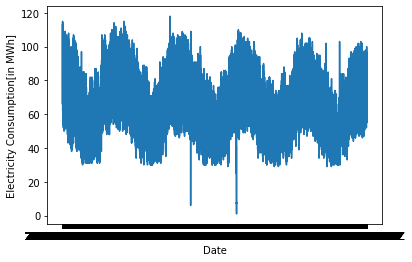

In [ ]:
fig,ax = plt.subplots()                       # Create a figure and a set of subplots.
plt.ylabel('Electricity Consumption[in MWh]') # labelling Y-axis
plt.xlabel('Date')                            # labelling X-axis
ax.plot(df['Date'],df['Consumption'])
plt.show()

In [ ]:
# WorldWeatherOnline historical weather data API wrapper
!pip install wwo-hist

In [ ]:
# Import Package 
from wwo_hist import retrieve_hist_data

In [ ]:
# Retrieving data until today i.e. 24-Jun-2020 from 11 dec 2017
frequency=1
start_date = '11-DEC-2017'
end_date = '7-JUL-2020'
api_key = '609fcb409bf4437e9bc121635200405'
location_list = ['Jabalpur']

hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = True,
                                export_csv = False,
                                store_df = True)



Retrieving weather data for Jabalpur


Currently retrieving data for Jabalpur: from 2017-12-11 to 2017-12-31
Time elapsed (hh:mm:ss.ms) 0:00:01.981536
Currently retrieving data for Jabalpur: from 2018-01-01 to 2018-01-31
Time elapsed (hh:mm:ss.ms) 0:00:04.204012
Currently retrieving data for Jabalpur: from 2018-02-01 to 2018-02-28
Time elapsed (hh:mm:ss.ms) 0:00:06.374313
Currently retrieving data for Jabalpur: from 2018-03-01 to 2018-03-31
Time elapsed (hh:mm:ss.ms) 0:00:09.070844
Currently retrieving data for Jabalpur: from 2018-04-01 to 2018-04-30
Time elapsed (hh:mm:ss.ms) 0:00:11.796798
Currently retrieving data for Jabalpur: from 2018-05-01 to 2018-05-31
Time elapsed (hh:mm:ss.ms) 0:00:14.134226
Currently retrieving data for Jabalpur: from 2018-06-01 to 2018-06-30
Time elapsed (hh:mm:ss.ms) 0:00:16.325312
Currently retrieving data for Jabalpur: from 2018-07-01 to 2018-07-31
Time elapsed (hh:mm:ss.ms) 0:00:19.198678
Currently retrieving data for Jabalpur: from 2018-08-01 to 2018

In [ ]:
# Function to convert Timestamp object to String 
def TimestampToString(t):
  return t.strftime("%Y%m%dT%HZ")

In [ ]:
type(hist_weather_data)

list

In [ ]:
# dataframe with hourly weather data from WorldWeatherOnline
hist_weather_data[0]

,date_time,Jabalpur_maxtempC,Jabalpur_mintempC,Jabalpur_totalSnow_cm,Jabalpur_sunHour,Jabalpur_uvIndex,Jabalpur_moon_illumination,Jabalpur_moonrise,Jabalpur_moonset,Jabalpur_sunrise,Jabalpur_sunset,Jabalpur_DewPointC,Jabalpur_FeelsLikeC,Jabalpur_HeatIndexC,Jabalpur_WindChillC,Jabalpur_WindGustKmph,Jabalpur_cloudcover,Jabalpur_humidity,Jabalpur_precipMM,Jabalpur_pressure,Jabalpur_tempC,Jabalpur_visibility,Jabalpur_winddirDegree,Jabalpur_windspeedKmph,Jabalpur_location
0,2017-12-11 00:00:00,27,14,0.0,8.7,5,41,12:28 AM,01:04 PM,06:41 AM,05:26 PM,7,19,19,19,3,0,45,0.0,1016,15,10,127,2,Jabalpur
1,2017-12-11 01:00:00,27,14,0.0,8.7,5,41,12:28 AM,01:04 PM,06:41 AM,05:26 PM,7,19,19,19,3,0,46,0.0,1015,14,10,136,2,Jabalpur
2,2017-12-11 02:00:00,27,14,0.0,8.7,5,41,12:28 AM,01:04 PM,06:41 AM,05:26 PM,7,18,18,18,4,0,47,0.0,1015,14,10,145,2,Jabalpur
3,2017-12-11 03:00:00,27,14,0.0,8.7,5,41,12:28 AM,01:04 PM,06:41 AM,05:26 PM,7,18,18,18,4,0,48,0.0,1015,14,10,153,3,Jabalpur
4,2017-12-11 04:00:00,27,14,0.0,8.7,5,41,12:28 AM,01:04 PM,06:41 AM,05:26 PM,7,19,20,19,4,0,46,0.0,1016,15,10,152,3,Jabalpur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,2020-07-07 19:00:00,31,25,0.0,10.9,6,85,09:00 PM,07:17 AM,05:30 AM,07:00 PM,23,31,31,28,24,24,75,0.0,1001,28,10,191,18,Jabalpur
20,2020-07-07 20:00:00,31,25,0.0,10.9,6,85,09:00 PM,07:17 AM,05:30 AM,07:00 PM,23,30,30,27,25,27,78,0.0,1002,27,10,189,18,Jabalpur
21,2020-07-07 21:00:00,31,25,0.0,10.9,6,85,09:00 PM,07:17 AM,05:30 AM,07:00 PM,23,29,29,26,25,30,80,0.0,1003,26,10,187,17,Jabalpur
22,2020-07-07 22:00:00,31,25,0.0,10.9,6,85,09:00 PM,07:17 AM,05:30 AM,07:00 PM,23,29,29,26,24,29,81,0.0,1003,26,10,185,16,Jabalpur


In [ ]:
# dataframe to list
a = hist_weather_data[0].values.tolist()
# Converting Timestamp to string
t = a[0][0]
print(TimestampToString(t))

20171211T00Z


In [ ]:
# features in a dataframes of hist_weather_data
print(hist_weather_data[0].columns)

Index(['date_time', 'Jabalpur_maxtempC', 'Jabalpur_mintempC',
       'Jabalpur_totalSnow_cm', 'Jabalpur_sunHour', 'Jabalpur_uvIndex',
       'Jabalpur_moon_illumination', 'Jabalpur_moonrise', 'Jabalpur_moonset',
       'Jabalpur_sunrise', 'Jabalpur_sunset', 'Jabalpur_DewPointC',
       'Jabalpur_FeelsLikeC', 'Jabalpur_HeatIndexC', 'Jabalpur_WindChillC',
       'Jabalpur_WindGustKmph', 'Jabalpur_cloudcover', 'Jabalpur_humidity',
       'Jabalpur_precipMM', 'Jabalpur_pressure', 'Jabalpur_tempC',
       'Jabalpur_visibility', 'Jabalpur_winddirDegree',
       'Jabalpur_windspeedKmph', 'Jabalpur_location'],
      dtype='object')


In [ ]:
# features which we are going use
features =['date_time', 'Jabalpur_maxtempC', 'Jabalpur_mintempC',
       'Jabalpur_totalSnow_cm','Jabalpur_DewPointC',
       'Jabalpur_FeelsLikeC', 'Jabalpur_HeatIndexC', 'Jabalpur_WindChillC',
       'Jabalpur_WindGustKmph', 'Jabalpur_cloudcover', 'Jabalpur_humidity',
       'Jabalpur_precipMM', 'Jabalpur_pressure', 'Jabalpur_tempC',
       'Jabalpur_visibility', 'Jabalpur_winddirDegree',
       'Jabalpur_windspeedKmph']

In [ ]:
# CONVERTING THE JSON FILE TO DATAFRAME OF REQUIRED FEATURES 

data = []                                     # List initialised which is used to store list of elements 

for i in hist_weather_data:                   # hist_weather_data is a list of dataframes(i) having hourly weather data

  a = i.values.tolist()                       # conversion of dataframe to list 'a'

  for j in a:                                 # 'a' is list of lists(having weather data), 'j' is a list in 'a'

    w = []                                    # 'w' list initialised to store data needed according to 'features'

    for k in range(len(j)):                   # iterating through the list 'j'
      if(k == 0):
        w.append(TimestampToString(j[k]))
      elif(i.columns[k] in features):         # if element belongs to property of 'features'
        w.append(j[k])                        # then that element is added to list 'w' 

    data.append(w)                            # appending 'w' in data

print(data)

[['20171211T00Z', '27', '14', '0.0', '7', '19', '19', '19', '3', '0', '45', '0.0', '1016', '15', '10', '127', '2'], ['20171211T01Z', '27', '14', '0.0', '7', '19', '19', '19', '3', '0', '46', '0.0', '1015', '14', '10', '136', '2'], ['20171211T02Z', '27', '14', '0.0', '7', '18', '18', '18', '4', '0', '47', '0.0', '1015', '14', '10', '145', '2'], ['20171211T03Z', '27', '14', '0.0', '7', '18', '18', '18', '4', '0', '48', '0.0', '1015', '14', '10', '153', '3'], ['20171211T04Z', '27', '14', '0.0', '7', '19', '20', '19', '4', '0', '46', '0.0', '1016', '15', '10', '152', '3'], ['20171211T05Z', '27', '14', '0.0', '8', '20', '22', '20', '5', '0', '44', '0.0', '1016', '16', '10', '150', '4'], ['20171211T06Z', '27', '14', '0.0', '8', '22', '24', '22', '5', '0', '42', '0.0', '1017', '18', '10', '148', '4'], ['20171211T07Z', '27', '14', '0.0', '8', '24', '25', '24', '5', '0', '37', '0.0', '1017', '20', '10', '149', '4'], ['20171211T08Z', '27', '14', '0.0', '8', '26', '26', '26', '5', '0', '32', '0.0

In [ ]:
weatherDataframe = pd.DataFrame(columns=features)   # Dataframe storing weather data according to 'features'

for v in data:
  d = []
  d.append(v[0])
  for i in v[1:]:
    d.append(float(i))

  ln = len(weatherDataframe)
  weatherDataframe.loc[ln] = d                      # Adding elements to weatherDataframe


In [ ]:
weatherDataframe.rename(columns = {'date_time':'Date'},inplace=True)
print(weatherDataframe.columns)

Index(['Date', 'Jabalpur_maxtempC', 'Jabalpur_mintempC',
       'Jabalpur_totalSnow_cm', 'Jabalpur_DewPointC', 'Jabalpur_FeelsLikeC',
       'Jabalpur_HeatIndexC', 'Jabalpur_WindChillC', 'Jabalpur_WindGustKmph',
       'Jabalpur_cloudcover', 'Jabalpur_humidity', 'Jabalpur_precipMM',
       'Jabalpur_pressure', 'Jabalpur_tempC', 'Jabalpur_visibility',
       'Jabalpur_winddirDegree', 'Jabalpur_windspeedKmph'],
      dtype='object')


In [ ]:
weatherDataframe.head()

,Date,Jabalpur_maxtempC,Jabalpur_mintempC,Jabalpur_totalSnow_cm,Jabalpur_DewPointC,Jabalpur_FeelsLikeC,Jabalpur_HeatIndexC,Jabalpur_WindChillC,Jabalpur_WindGustKmph,Jabalpur_cloudcover,Jabalpur_humidity,Jabalpur_precipMM,Jabalpur_pressure,Jabalpur_tempC,Jabalpur_visibility,Jabalpur_winddirDegree,Jabalpur_windspeedKmph
0,20171211T00Z,27.0,14.0,0.0,7.0,19.0,19.0,19.0,3.0,0.0,45.0,0.0,1016.0,15.0,10.0,127.0,2.0
1,20171211T01Z,27.0,14.0,0.0,7.0,19.0,19.0,19.0,3.0,0.0,46.0,0.0,1015.0,14.0,10.0,136.0,2.0
2,20171211T02Z,27.0,14.0,0.0,7.0,18.0,18.0,18.0,4.0,0.0,47.0,0.0,1015.0,14.0,10.0,145.0,2.0
3,20171211T03Z,27.0,14.0,0.0,7.0,18.0,18.0,18.0,4.0,0.0,48.0,0.0,1015.0,14.0,10.0,153.0,3.0
4,20171211T04Z,27.0,14.0,0.0,7.0,19.0,20.0,19.0,4.0,0.0,46.0,0.0,1016.0,15.0,10.0,152.0,3.0


In [ ]:
weatherDataframe.head()

,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_totalSnow_cm,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph
0,20171211T00Z,19.0,9.0,0.0,1.0,8.0,10.0,8.0,28.0,0.0,55.0,0.0,1024.0,10.0,10.0,335.0,16.0
1,20171211T01Z,19.0,9.0,0.0,2.0,8.0,10.0,8.0,28.0,0.0,55.0,0.0,1024.0,10.0,10.0,337.0,16.0
2,20171211T02Z,19.0,9.0,0.0,2.0,8.0,10.0,8.0,28.0,0.0,56.0,0.0,1024.0,10.0,10.0,338.0,16.0
3,20171211T03Z,19.0,9.0,0.0,2.0,8.0,10.0,8.0,29.0,0.0,57.0,0.0,1024.0,10.0,10.0,339.0,16.0
4,20171211T04Z,19.0,9.0,0.0,1.0,7.0,10.0,7.0,29.0,0.0,54.0,0.0,1024.0,10.0,10.0,342.0,17.0


In [ ]:
df.head()

,Date,Consumption
42644,20200625T22Z,113.0
42643,20200625T21Z,112.0
42642,20200625T20Z,110.0
42641,20200625T19Z,70.0
42640,20200625T18Z,106.0


In [ ]:
joinFeatures = ['Date']

In [ ]:
DataFrame = pd.merge(df,weatherDataframe,on = joinFeatures)

In [ ]:
x,y = DataFrame.shape
print(x,y)

22560 17


In [ ]:
DataFrame=weatherDataframe.copy(deep=True)

In [ ]:
DataFrame.head()

,Date,Jabalpur_maxtempC,Jabalpur_mintempC,Jabalpur_totalSnow_cm,Jabalpur_DewPointC,Jabalpur_FeelsLikeC,Jabalpur_HeatIndexC,Jabalpur_WindChillC,Jabalpur_WindGustKmph,Jabalpur_cloudcover,Jabalpur_humidity,Jabalpur_precipMM,Jabalpur_pressure,Jabalpur_tempC,Jabalpur_visibility,Jabalpur_winddirDegree,Jabalpur_windspeedKmph
0,20171211T00Z,27.0,14.0,0.0,7.0,19.0,19.0,19.0,3.0,0.0,45.0,0.0,1016.0,15.0,10.0,127.0,2.0
1,20171211T01Z,27.0,14.0,0.0,7.0,19.0,19.0,19.0,3.0,0.0,46.0,0.0,1015.0,14.0,10.0,136.0,2.0
2,20171211T02Z,27.0,14.0,0.0,7.0,18.0,18.0,18.0,4.0,0.0,47.0,0.0,1015.0,14.0,10.0,145.0,2.0
3,20171211T03Z,27.0,14.0,0.0,7.0,18.0,18.0,18.0,4.0,0.0,48.0,0.0,1015.0,14.0,10.0,153.0,3.0
4,20171211T04Z,27.0,14.0,0.0,7.0,19.0,20.0,19.0,4.0,0.0,46.0,0.0,1016.0,15.0,10.0,152.0,3.0


In [ ]:
features = list(DataFrame.columns)
print(features)

['Date', 'Jabalpur_maxtempC', 'Jabalpur_mintempC', 'Jabalpur_totalSnow_cm', 'Jabalpur_DewPointC', 'Jabalpur_FeelsLikeC', 'Jabalpur_HeatIndexC', 'Jabalpur_WindChillC', 'Jabalpur_WindGustKmph', 'Jabalpur_cloudcover', 'Jabalpur_humidity', 'Jabalpur_precipMM', 'Jabalpur_pressure', 'Jabalpur_tempC', 'Jabalpur_visibility', 'Jabalpur_winddirDegree', 'Jabalpur_windspeedKmph']


In [ ]:
DataFrame = DataFrame.values.tolist()

for i in range(x):
  DataFrame[i][0] = pd.to_datetime(DataFrame[i][0],format = '%Y%m%dT%HZ')

DataFrame = pd.DataFrame(DataFrame)

In [ ]:
DataFrame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2017-12-11 00:00:00,27.0,14.0,0.0,7.0,19.0,19.0,19.0,3.0,0.0,45.0,0.0,1016.0,15.0,10.0,127.0,2.0
1,2017-12-11 01:00:00,27.0,14.0,0.0,7.0,19.0,19.0,19.0,3.0,0.0,46.0,0.0,1015.0,14.0,10.0,136.0,2.0
2,2017-12-11 02:00:00,27.0,14.0,0.0,7.0,18.0,18.0,18.0,4.0,0.0,47.0,0.0,1015.0,14.0,10.0,145.0,2.0
3,2017-12-11 03:00:00,27.0,14.0,0.0,7.0,18.0,18.0,18.0,4.0,0.0,48.0,0.0,1015.0,14.0,10.0,153.0,3.0
4,2017-12-11 04:00:00,27.0,14.0,0.0,7.0,19.0,20.0,19.0,4.0,0.0,46.0,0.0,1016.0,15.0,10.0,152.0,3.0


In [ ]:
from collections import *

d ={}#defaultdict(lambda : 0)
for i in range(len(features)):
  d[i] = features[i]

DataFrame.rename(columns = d,inplace=True)

In [ ]:
DataFrame.drop(['Jabalpur_totalSnow_cm'],axis=1,inplace=True)
#r = DataFrame.pop("Consumption")
#DataFrame['Consumption'] = r
DataFrame.head()

,Date,Jabalpur_maxtempC,Jabalpur_mintempC,Jabalpur_DewPointC,Jabalpur_FeelsLikeC,Jabalpur_HeatIndexC,Jabalpur_WindChillC,Jabalpur_WindGustKmph,Jabalpur_cloudcover,Jabalpur_humidity,Jabalpur_precipMM,Jabalpur_pressure,Jabalpur_tempC,Jabalpur_visibility,Jabalpur_winddirDegree,Jabalpur_windspeedKmph
0,2017-12-11 00:00:00,27.0,14.0,7.0,19.0,19.0,19.0,3.0,0.0,45.0,0.0,1016.0,15.0,10.0,127.0,2.0
1,2017-12-11 01:00:00,27.0,14.0,7.0,19.0,19.0,19.0,3.0,0.0,46.0,0.0,1015.0,14.0,10.0,136.0,2.0
2,2017-12-11 02:00:00,27.0,14.0,7.0,18.0,18.0,18.0,4.0,0.0,47.0,0.0,1015.0,14.0,10.0,145.0,2.0
3,2017-12-11 03:00:00,27.0,14.0,7.0,18.0,18.0,18.0,4.0,0.0,48.0,0.0,1015.0,14.0,10.0,153.0,3.0
4,2017-12-11 04:00:00,27.0,14.0,7.0,19.0,20.0,19.0,4.0,0.0,46.0,0.0,1016.0,15.0,10.0,152.0,3.0


In [ ]:
DataFrame.to_csv('Jabalpur_weatherdata.csv',index=True)

# ***FEATURE SELECTION***
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

## **Correlation Matrix with Heatmap**

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

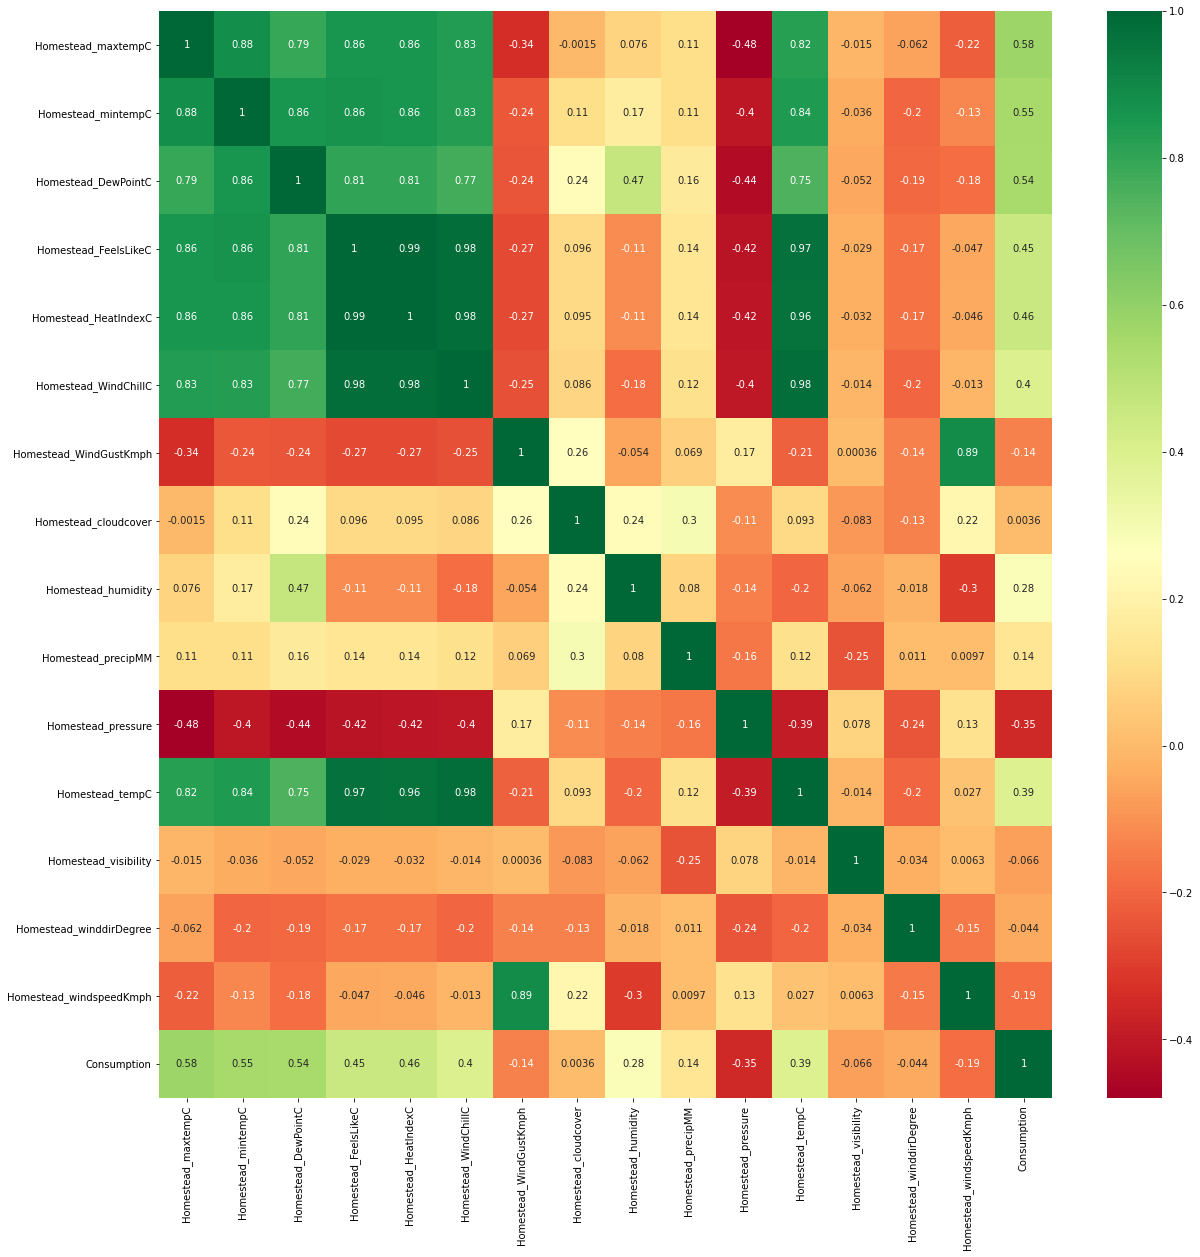

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = DataFrame.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(DataFrame[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## ***Pearson Correlation Coefficient***

Pearson's Correlation Coefficient helps to find out the relationship between two quantities. It gives the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

In [ ]:
pearsoncorr = DataFrame.corr(method='pearson')
pearsoncorr

,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph,Consumption
Homestead_maxtempC,1.000000,0.883273,0.794992,0.857267,0.857561,0.833336,-0.338743,-0.001452,0.075693,0.114976,-0.480098,0.820983,-0.015487,-0.061980,-0.217996,0.577841
Homestead_mintempC,0.883273,1.000000,0.856503,0.862417,0.858269,0.827579,-0.235670,0.111913,0.172242,0.113380,-0.404993,0.843137,-0.035897,-0.199883,-0.126103,0.553478
Homestead_DewPointC,0.794992,0.856503,1.000000,0.808247,0.807241,0.771709,-0.242878,0.242034,0.466462,0.160314,-0.443265,0.745863,-0.052186,-0.192686,-0.182900,0.544152
Homestead_FeelsLikeC,0.857267,0.862417,0.808247,1.000000,0.994568,0.981961,-0.268208,0.095767,-0.114265,0.138546,-0.418591,0.968033,-0.029470,-0.172721,-0.046863,0.452178
Homestead_HeatIndexC,0.857561,0.858269,0.807241,0.994568,1.000000,0.977934,-0.269109,0.094952,-0.114841,0.139474,-0.415210,0.962164,-0.032433,-0.168344,-0.046278,0.456179
Homestead_WindChillC,0.833336,0.827579,0.771709,0.981961,0.977934,1.000000,-0.249737,0.086423,-0.182324,0.117787,-0.401569,0.978339,-0.013627,-0.198564,-0.013097,0.398311
Homestead_WindGustKmph,-0.338743,-0.235670,-0.242878,-0.268208,-0.269109,-0.249737,1.000000,0.256752,-0.053944,0.069052,0.167979,-0.214068,0.000364,-0.138623,0.887189,-0.135908
Homestead_cloudcover,-0.001452,0.111913,0.242034,0.095767,0.094952,0.086423,0.256752,1.000000,0.243101,0.297610,-0.113840,0.092790,-0.083158,-0.133451,0.217123,0.003571
Homestead_humidity,0.075693,0.172242,0.466462,-0.114265,-0.114841,-0.182324,-0.053944,0.243101,1.000000,0.079939,-0.141012,-0.201838,-0.061892,-0.018131,-0.302649,0.280944
Homestead_precipMM,0.114976,0.113380,0.160314,0.138546,0.139474,0.117787,0.069052,0.297610,0.079939,1.000000,-0.158634,0.118801,-0.248137,0.011245,0.009692,0.138636


In [ ]:
pearsoncorr_list = pearsoncorr.values.tolist()                     # Dataframe 'pearsoncorr' with pearson correlation values among features converted to list

features = DataFrame.columns
features = features[1:-1]                                    # features of DataFrame except Date

a = list(pearsoncorr_list[-1])                              # Pearson correlation value of features vs consumption
pf = pd.DataFrame(columns=['Features','ratio'])            # Dataframe to visualise list 'a' values relation to features

print('CONSUMPTION CORRELATIONS (PEARSON) FOR HOMESTEAD')

for i in range(len(a)-1):
  d = [features[i],a[i]]
  ln = len(pf)
  pf.loc[ln] = d

pf

CONSUMPTION CORRELATIONS (PEARSON) FOR HOMESTEAD


,Features,ratio
0,Homestead_maxtempC,0.577841
1,Homestead_mintempC,0.553478
2,Homestead_DewPointC,0.544152
3,Homestead_FeelsLikeC,0.452178
4,Homestead_HeatIndexC,0.456179
5,Homestead_WindChillC,0.398311
6,Homestead_WindGustKmph,-0.135908
7,Homestead_cloudcover,0.003571
8,Homestead_humidity,0.280944
9,Homestead_precipMM,0.138636


## ***Kendall rank correlation coefficient***

It is a measure of rank correlation: the similarity of the orderings of the data when ranked by each of the quantities.

The Kendall correlation between two variables will be high when observations have a similar (or identical for a correlation of 1) rank (i.e. relative position label of the observations within the variable: 1st, 2nd, 3rd, etc.) between the two variables, and low when observations have a dissimilar (or fully different for a correlation of −1) rank between the two variables.

In [ ]:
corr = DataFrame.corr(method='kendall')
corr

,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph,Consumption
Homestead_maxtempC,1.000000,0.751105,0.651346,0.708901,0.710677,0.666073,-0.249774,0.012599,-0.002150,0.169663,-0.363422,0.662237,-0.136811,0.084406,-0.158470,0.431345
Homestead_mintempC,0.751105,1.000000,0.742600,0.736759,0.736925,0.672272,-0.192284,0.085252,0.045264,0.173675,-0.294250,0.674006,-0.149589,-0.018601,-0.112367,0.421851
Homestead_DewPointC,0.651346,0.742600,1.000000,0.647369,0.649043,0.563114,-0.214497,0.146269,0.246169,0.218764,-0.334871,0.552116,-0.180126,0.032274,-0.172216,0.433854
Homestead_FeelsLikeC,0.708901,0.736759,0.647369,1.000000,0.991251,0.926985,-0.192564,0.069064,-0.153418,0.179692,-0.303844,0.916246,-0.136877,0.022845,-0.036438,0.316264
Homestead_HeatIndexC,0.710677,0.736925,0.649043,0.991251,1.000000,0.920974,-0.193706,0.069169,-0.151775,0.179616,-0.304355,0.910518,-0.137828,0.023688,-0.037504,0.319454
Homestead_WindChillC,0.666073,0.672272,0.563114,0.926985,0.920974,1.000000,-0.173991,0.049855,-0.242750,0.162573,-0.286507,0.976896,-0.116260,0.016067,-0.000665,0.270263
Homestead_WindGustKmph,-0.249774,-0.192284,-0.214497,-0.192564,-0.193706,-0.173991,1.000000,0.141697,-0.048795,0.033156,0.118758,-0.152044,0.010955,-0.140094,0.750892,-0.086757
Homestead_cloudcover,0.012599,0.085252,0.146269,0.069064,0.069169,0.049855,0.141697,1.000000,0.157785,0.347088,-0.100682,0.062429,-0.202262,-0.085750,0.126079,0.018218
Homestead_humidity,-0.002150,0.045264,0.246169,-0.153418,-0.151775,-0.242750,-0.048795,0.157785,1.000000,0.070180,-0.093171,-0.248444,-0.076373,0.008725,-0.231586,0.189348
Homestead_precipMM,0.169663,0.173675,0.218764,0.179692,0.179616,0.162573,0.033156,0.347088,0.070180,1.000000,-0.188820,0.167303,-0.506659,0.022028,0.012014,0.150670


In [ ]:
DataFrame

,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph,Consumption
0,2020-05-18 23:00:00,32.0,25.0,22.0,28.0,28.0,26.0,21.0,51.0,82.0,0.3,1014.0,26.0,9.0,163.0,12.0,94.0
1,2020-05-18 22:00:00,32.0,25.0,22.0,29.0,29.0,26.0,20.0,43.0,78.0,0.1,1014.0,26.0,10.0,175.0,12.0,94.0
2,2020-05-18 21:00:00,32.0,25.0,22.0,29.0,29.0,27.0,19.0,35.0,74.0,0.2,1014.0,27.0,10.0,186.0,12.0,95.0
3,2020-05-18 20:00:00,32.0,25.0,21.0,30.0,30.0,28.0,20.0,30.0,68.0,0.2,1014.0,28.0,10.0,192.0,14.0,94.0
4,2020-05-18 19:00:00,32.0,25.0,21.0,31.0,31.0,29.0,21.0,24.0,63.0,0.0,1013.0,29.0,10.0,198.0,16.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21277,2017-12-11 04:00:00,19.0,9.0,1.0,7.0,10.0,7.0,29.0,0.0,54.0,0.0,1024.0,10.0,10.0,342.0,17.0,46.0
21278,2017-12-11 03:00:00,19.0,9.0,2.0,8.0,10.0,8.0,29.0,0.0,57.0,0.0,1024.0,10.0,10.0,339.0,16.0,52.0
21279,2017-12-11 02:00:00,19.0,9.0,2.0,8.0,10.0,8.0,28.0,0.0,56.0,0.0,1024.0,10.0,10.0,338.0,16.0,55.0
21280,2017-12-11 01:00:00,19.0,9.0,2.0,8.0,10.0,8.0,28.0,0.0,55.0,0.0,1024.0,10.0,10.0,337.0,16.0,56.0


## ***R Squared Correlation***

Correlation (otherwise known as “R”) is a number between 1 and -1 where a value of +1 implies that an increase in x results in some increase in y, -1 implies that an increase in x results in a decrease in y, and 0 means that there isn’t any relationship between x and y. Like correlation, R² tells you how related two things are. However, we tend to use R² because it’s easier to interpret. R² is the percentage of variation (i.e. varies from 0 to 1) explained by the relationship between two variables.

### ***R² = (var(mean) - var(line)) / var(mean)***

In [ ]:
RConsumption = {}
h = ['Date','Consumption']
for col in DataFrame.columns:
  if( col not in h):
    slope, intercept, r_value, p_value, std_err = scipy.stats.stats.linregress(DataFrame['Consumption'], DataFrame[col])
    RConsumption[col] = r_value**2
print('DEMAND CORRELATIONS (r^2) FOR HOMESTEAD')

cons_df = pd.DataFrame(RConsumption.items(), columns=['Features', 'r**2'])
cons_df

DEMAND CORRELATIONS (r^2) FOR HOMESTEAD


,Features,r**2
0,Homestead_maxtempC,0.333900
1,Homestead_mintempC,0.306338
2,Homestead_DewPointC,0.296101
3,Homestead_FeelsLikeC,0.204465
4,Homestead_HeatIndexC,0.208099
5,Homestead_WindChillC,0.158652
6,Homestead_WindGustKmph,0.018471
7,Homestead_cloudcover,0.000013
8,Homestead_humidity,0.078929
9,Homestead_precipMM,0.019220


## ***Features Drop-out***

In [ ]:
DataFrame.columns

Index(['Date', 'Homestead_maxtempC', 'Homestead_mintempC',
       'Homestead_DewPointC', 'Homestead_FeelsLikeC', 'Homestead_HeatIndexC',
       'Homestead_WindChillC', 'Homestead_WindGustKmph',
       'Homestead_cloudcover', 'Homestead_humidity', 'Homestead_precipMM',
       'Homestead_pressure', 'Homestead_tempC', 'Homestead_visibility',
       'Homestead_winddirDegree', 'Homestead_windspeedKmph', 'Consumption'],
      dtype='object')

In [ ]:
DataFrame

,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph,Consumption
0,2020-06-25 03:00:00,33.0,27.0,25.0,32.0,32.0,28.0,12.0,9.0,83.0,0.0,1017.0,28.0,10.0,92.0,8.0,94.0
1,2020-06-25 02:00:00,33.0,27.0,25.0,33.0,33.0,28.0,11.0,8.0,82.0,0.0,1017.0,28.0,10.0,93.0,8.0,101.0
2,2020-06-25 01:00:00,33.0,27.0,25.0,34.0,34.0,28.0,10.0,7.0,82.0,0.0,1017.0,28.0,10.0,95.0,7.0,105.0
3,2020-06-25 00:00:00,33.0,27.0,25.0,34.0,34.0,29.0,9.0,6.0,81.0,0.0,1017.0,29.0,10.0,96.0,7.0,107.0


In [ ]:
dataframe2 = DataFrame.copy()
dataframe2

,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_cloudcover,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_visibility,Homestead_winddirDegree,Homestead_windspeedKmph,Consumption
0,2020-06-25 03:00:00,33.0,27.0,25.0,32.0,32.0,28.0,12.0,9.0,83.0,0.0,1017.0,28.0,10.0,92.0,8.0,94.0
1,2020-06-25 02:00:00,33.0,27.0,25.0,33.0,33.0,28.0,11.0,8.0,82.0,0.0,1017.0,28.0,10.0,93.0,8.0,101.0
2,2020-06-25 01:00:00,33.0,27.0,25.0,34.0,34.0,28.0,10.0,7.0,82.0,0.0,1017.0,28.0,10.0,95.0,7.0,105.0
3,2020-06-25 00:00:00,33.0,27.0,25.0,34.0,34.0,29.0,9.0,6.0,81.0,0.0,1017.0,29.0,10.0,96.0,7.0,107.0


In [ ]:
dataframe2.to_csv('electric_consumption_25jun.csv')

In [ ]:
dataframe2.columns

Index(['Date', 'Homestead_maxtempC', 'Homestead_mintempC',
       'Homestead_DewPointC', 'Homestead_FeelsLikeC', 'Homestead_HeatIndexC',
       'Homestead_WindChillC', 'Homestead_WindGustKmph',
       'Homestead_cloudcover', 'Homestead_humidity', 'Homestead_precipMM',
       'Homestead_pressure', 'Homestead_tempC', 'Homestead_visibility',
       'Homestead_winddirDegree', 'Homestead_windspeedKmph', 'Consumption'],
      dtype='object')

In [ ]:
from google.colab import files
files.download('electric_consumption_25jun.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We have extracted data from above module and store in .csv file, data until 24th june 2020

In [ ]:
dataframe2=pd.read_csv('Datasets/electric_consumption_till_24june.csv')

In [ ]:
dataframe2.columns

Index(['Unnamed: 0', 'Date', 'Homestead_maxtempC', 'Homestead_mintempC',
       'Homestead_DewPointC', 'Homestead_FeelsLikeC', 'Homestead_HeatIndexC',
       'Homestead_WindChillC', 'Homestead_WindGustKmph',
       'Homestead_cloudcover', 'Homestead_humidity', 'Homestead_precipMM',
       'Homestead_pressure', 'Homestead_tempC', 'Homestead_visibility',
       'Homestead_winddirDegree', 'Homestead_windspeedKmph', 'Consumption'],
      dtype='object')

In [ ]:
dataframe2['Day']= pd.DatetimeIndex(dataframe2['Date']).day
dataframe2['month']=pd.DatetimeIndex(dataframe2['Date']).month
dataframe2['Year']=pd.DatetimeIndex(dataframe2['Date']).year

In [ ]:
pearsoncorr = dataframe2.corr(method='pearson')
pearsoncorr['Consumption']

Unnamed: 0                -0.127816
Homestead_maxtempC         0.576520
Homestead_mintempC         0.551163
Homestead_DewPointC        0.543572
Homestead_FeelsLikeC       0.450708
Homestead_HeatIndexC       0.454674
Homestead_WindChillC       0.397591
Homestead_WindGustKmph    -0.134376
Homestead_cloudcover       0.015072
Homestead_humidity         0.277421
Homestead_precipMM         0.135236
Homestead_pressure        -0.353292
Homestead_tempC            0.390807
Homestead_visibility      -0.069966
Homestead_winddirDegree   -0.054585
Homestead_windspeedKmph   -0.181886
Consumption                1.000000
Day                       -0.009974
month                      0.195625
Year                       0.047705
Name: Consumption, dtype: float64

In [ ]:
f = ['Unnamed: 0','Homestead_cloudcover','Homestead_visibility','Homestead_winddirDegree','Day','Year']

In [ ]:
dataframe2.drop(f,axis = 1,inplace = True)

In [ ]:
cnsm=dataframe2.pop('Consumption')
dataframe2['Consumption']=cnsm

In [ ]:
dataframe2

,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_windspeedKmph,month,Consumption
0,2020-06-24 23:00:00,34.0,28.0,25.0,34.0,34.0,29.0,12.0,80.0,0.0,1017.0,29.0,8.0,6,112.0
1,2020-06-24 22:00:00,34.0,28.0,25.0,34.0,34.0,29.0,14.0,79.0,0.0,1017.0,29.0,10.0,6,115.0
2,2020-06-24 21:00:00,34.0,28.0,25.0,35.0,35.0,29.0,16.0,77.0,0.0,1016.0,29.0,12.0,6,114.0
3,2020-06-24 20:00:00,34.0,28.0,24.0,35.0,35.0,30.0,18.0,73.0,0.0,1016.0,30.0,13.0,6,111.0
4,2020-06-24 19:00:00,34.0,28.0,24.0,36.0,36.0,31.0,19.0,68.0,0.0,1016.0,31.0,15.0,6,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22178,2017-12-11 04:00:00,19.0,9.0,1.0,7.0,10.0,7.0,29.0,54.0,0.0,1024.0,10.0,17.0,12,46.0
22179,2017-12-11 03:00:00,19.0,9.0,2.0,8.0,10.0,8.0,29.0,57.0,0.0,1024.0,10.0,16.0,12,52.0
22180,2017-12-11 02:00:00,19.0,9.0,2.0,8.0,10.0,8.0,28.0,56.0,0.0,1024.0,10.0,16.0,12,55.0
22181,2017-12-11 01:00:00,19.0,9.0,2.0,8.0,10.0,8.0,28.0,55.0,0.0,1024.0,10.0,16.0,12,56.0


In [ ]:
print(dataframe2.columns)

Index(['Date', 'Homestead_maxtempC', 'Homestead_mintempC',
       'Homestead_DewPointC', 'Homestead_FeelsLikeC', 'Homestead_HeatIndexC',
       'Homestead_WindChillC', 'Homestead_WindGustKmph', 'Homestead_humidity',
       'Homestead_precipMM', 'Homestead_pressure', 'Homestead_tempC',
       'Homestead_windspeedKmph', 'month', 'Consumption'],
      dtype='object')


In [ ]:
dataframe2.shape

(22183, 15)

# ***DATA NORMALISATION***

In [ ]:
Date = dataframe2.pop('Date')           # Removing column 'Date' from dataframe2, need not to be normalized

In [ ]:
values = dataframe2.values              #converting to np array

## **MinMaxScaler**

Standardizes features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.

The standardization is given by:
```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```



where min, max = feature_range.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)           # Fit to data, then transform it.

In [ ]:
scaled.shape

(22183, 14)

In [ ]:
dataframe2['Date'] = Date                       #adding date back

In [ ]:
dataframe2.shape

(22183, 15)

In [ ]:
scaled                                         #normalized values

array([[0.95      , 1.        , 0.96875   , ..., 0.18604651, 0.45454545,
        0.94642857],
       [0.95      , 1.        , 0.96875   , ..., 0.23255814, 0.45454545,
        0.97321429],
       [0.95      , 1.        , 0.96875   , ..., 0.27906977, 0.45454545,
        0.96428571],
       ...,
       [0.2       , 0.32142857, 0.25      , ..., 0.37209302, 1.        ,
        0.4375    ],
       [0.2       , 0.32142857, 0.25      , ..., 0.37209302, 1.        ,
        0.44642857],
       [0.2       , 0.32142857, 0.21875   , ..., 0.37209302, 1.        ,
        0.44642857]])

In [ ]:
DataFrame1 = dataframe2.copy(deep = False)
DataFrame1.head()

,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_windspeedKmph,month,Consumption,Date
0,34.0,28.0,25.0,34.0,34.0,29.0,12.0,80.0,0.0,1017.0,29.0,8.0,6,112.0,2020-06-24 23:00:00
1,34.0,28.0,25.0,34.0,34.0,29.0,14.0,79.0,0.0,1017.0,29.0,10.0,6,115.0,2020-06-24 22:00:00
2,34.0,28.0,25.0,35.0,35.0,29.0,16.0,77.0,0.0,1016.0,29.0,12.0,6,114.0,2020-06-24 21:00:00
3,34.0,28.0,24.0,35.0,35.0,30.0,18.0,73.0,0.0,1016.0,30.0,13.0,6,111.0,2020-06-24 20:00:00
4,34.0,28.0,24.0,36.0,36.0,31.0,19.0,68.0,0.0,1016.0,31.0,15.0,6,108.0,2020-06-24 19:00:00


# ***Training and Testing***

In [ ]:
 # convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[range(14,27)],axis=1,inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var14(t)
1,0.95,1.0,0.96875,0.871795,0.852941,0.828571,0.190476,0.770115,0.0,0.52,0.828571,0.186047,0.454545,0.946429,0.973214
2,0.95,1.0,0.96875,0.871795,0.852941,0.828571,0.222222,0.758621,0.0,0.52,0.828571,0.232558,0.454545,0.973214,0.964286
3,0.95,1.0,0.96875,0.897436,0.882353,0.828571,0.253968,0.735632,0.0,0.48,0.828571,0.279070,0.454545,0.964286,0.937500
4,0.95,1.0,0.93750,0.897436,0.882353,0.857143,0.285714,0.689655,0.0,0.48,0.857143,0.302326,0.454545,0.937500,0.910714
5,0.95,1.0,0.93750,0.923077,0.911765,0.885714,0.301587,0.632184,0.0,0.48,0.885714,0.348837,0.454545,0.910714,0.866071


In [ ]:
# split into train and test sets(68:32 ratio)
values = reframed.values
n_train_hours = int(len(values)*0.68)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(15083, 1, 14) (15083,) (7099, 1, 14) (7099,)


In [ ]:
print(values)

[[0.95       1.         0.96875    ... 0.45454545 0.94642857 0.97321429]
 [0.95       1.         0.96875    ... 0.45454545 0.97321429 0.96428571]
 [0.95       1.         0.96875    ... 0.45454545 0.96428571 0.9375    ]
 ...
 [0.2        0.32142857 0.25       ... 1.         0.41071429 0.4375    ]
 [0.2        0.32142857 0.25       ... 1.         0.4375     0.44642857]
 [0.2        0.32142857 0.25       ... 1.         0.44642857 0.44642857]]


Sequential class model is a linear stack of Layers. You can create a Sequential model and define all of the layers in the constructor.

We have used

1.LSTM Layer

2.Dense Layer

Why we are using LSTM Layer?

Typical RNN uses information from the previous step to predict the output.But if only the previous step is not enough,that is long term dependency.If we use RNN using all previous steps ,the **explosion/vanishing gradient problem** is encountered.

LSTM can solve this problem, because it uses gates to control the memorizing process. 

**Model Compliation**

Model optimizer is the search technique used to update weights in your model.(uses gradient descent methods to minimize the loss function)

The loss function, also called the objective function is the evaluation of the model used by the optimizer to navigate the weight space.


Train on 15083 samples, validate on 7099 samples
Epoch 1/250
 - 1s - loss: 0.1209 - val_loss: 0.0696
Epoch 2/250
 - 0s - loss: 0.0532 - val_loss: 0.0398
Epoch 3/250
 - 0s - loss: 0.0278 - val_loss: 0.0365
Epoch 4/250
 - 0s - loss: 0.0234 - val_loss: 0.0315
Epoch 5/250
 - 0s - loss: 0.0226 - val_loss: 0.0300
Epoch 6/250
 - 0s - loss: 0.0227 - val_loss: 0.0288
Epoch 7/250
 - 0s - loss: 0.0225 - val_loss: 0.0275
Epoch 8/250
 - 0s - loss: 0.0224 - val_loss: 0.0268
Epoch 9/250
 - 0s - loss: 0.0224 - val_loss: 0.0264
Epoch 10/250
 - 0s - loss: 0.0224 - val_loss: 0.0260
Epoch 11/250
 - 0s - loss: 0.0222 - val_loss: 0.0262
Epoch 12/250
 - 0s - loss: 0.0221 - val_loss: 0.0260
Epoch 13/250
 - 0s - loss: 0.0220 - val_loss: 0.0260
Epoch 14/250
 - 0s - loss: 0.0220 - val_loss: 0.0259
Epoch 15/250
 - 0s - loss: 0.0220 - val_loss: 0.0260
Epoch 16/250
 - 0s - loss: 0.0219 - val_loss: 0.0255
Epoch 17/250
 - 0s - loss: 0.0219 - val_loss: 0.0254
Epoch 18/250
 - 0s - loss: 0.0220 - val_loss: 0.0253
Epoch 

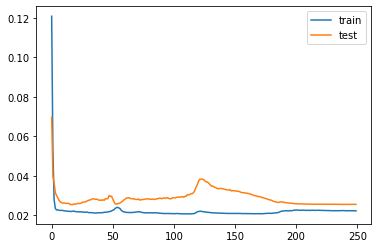

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=250, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
print(test_X.shape)

(7099, 1, 14)


In [ ]:
# make a prediction
yhat = model.predict(test_X)
print(yhat.shape)

(7099, 1)


In [ ]:
#reshaping as the shape when scaling was done
test_x = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((test_x[:,:-1],yhat), axis=1)
print(inv_yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
#reshaping as the shape when scaling was done
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_x[:,:-1],test_y), axis=1)
# invert scaling for actual
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(7099, 14)
Test RMSE: 3.714


In [ ]:
 
 from sklearn.metrics import r2_score
 r2_score(inv_y, inv_yhat)

0.9572321401482414

In scholarly research that focuses on marketing issues, R2 values of *0.75, **0.50**, or 0.25* can, as a rough rule of thumb, be respectively described as substantial, **moderate**, or weak. Sarstedt, M., & Mooi, E. (2014,p.211). 

https://people.duke.edu/~rnau/rsquared.htm

In [ ]:
com=pd.DataFrame(list(zip(inv_y,inv_yhat)),columns=['Actual','Predicted'])
com.iloc[15:35,:]

,Actual,Predicted
15,71.0,77.572246
16,68.0,69.331009
17,63.0,64.688873
18,58.0,60.652312
19,57.0,56.439486
20,60.0,55.218196
21,59.0,57.861147
22,57.0,57.492620
23,57.0,55.971618
24,59.0,58.091760


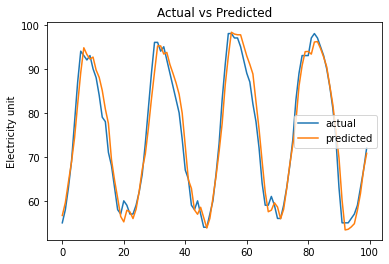

In [ ]:

y=inv_y[:100]
predicted=inv_yhat[:100]
plt.plot(y,label='actual')
plt.plot(predicted,label='predicted')
plt.ylabel('Electricity unit')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
import pickle 
  
# Save the trained model. 
Pkl_Filename = "Pickle_EC_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
from google.colab import files
files.download(Pkl_Filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Prediction**

In [ ]:
test_data= pd.read_csv('Datasets/electric_consumption_25jun.csv')
print(test_data.shape)

(4, 15)


In [ ]:
f = ['Unnamed: 0']
test_data.drop(f,axis = 1,inplace = True)
test_data.head()

,Date,Homestead_maxtempC,Homestead_mintempC,Homestead_DewPointC,Homestead_FeelsLikeC,Homestead_HeatIndexC,Homestead_WindChillC,Homestead_WindGustKmph,Homestead_humidity,Homestead_precipMM,Homestead_pressure,Homestead_tempC,Homestead_windspeedKmph,Consumption
0,2020-06-25 03:00:00,33.0,27.0,25.0,32.0,32.0,28.0,12.0,83.0,0.0,1017.0,28.0,8.0,94.0
1,2020-06-25 02:00:00,33.0,27.0,25.0,33.0,33.0,28.0,11.0,82.0,0.0,1017.0,28.0,8.0,101.0
2,2020-06-25 01:00:00,33.0,27.0,25.0,34.0,34.0,28.0,10.0,82.0,0.0,1017.0,28.0,7.0,105.0
3,2020-06-25 00:00:00,33.0,27.0,25.0,34.0,34.0,29.0,9.0,81.0,0.0,1017.0,29.0,7.0,107.0


In [ ]:
actual=test_data['Consumption']
actual=actual.values

In [ ]:
actual.shape

(4,)

In [ ]:
Date = test_data.pop('Date')           # Removing column 'Date' from dataframe2
values = test_data.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)           # Fit to data, then transform it.
test_data['Date'] = Date

In [ ]:
scaled.shape

(4, 13)

In [ ]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[range(13,26)],axis=1,inplace=True)
reframed.head()
values = reframed.values
test_x,test_y=values[:,:-1],values[:,-1]
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))


In [ ]:
yhat_test = model.predict(test_x)

In [ ]:
yhat_test.shape

(3, 1)

In [ ]:
test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((test_x,yhat_test), axis=1)
print(inv_yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_x,test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

(3, 13)


In [ ]:
print(inv_y.shape,inv_yhat.shape)

(3,) (3,)


In [ ]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4.693


In [ ]:
com=pd.DataFrame(list(zip(inv_y,inv_yhat)),columns=['Actual','Predicted'])
com.tail()

,Actual,Predicted
0,94.0,102.054485
1,101.0,102.094859
2,105.0,104.888337
